# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

Distribution of 'actual' values:
 actual
1.0    60.0
0.0    40.0
Name: proportion, dtype: float64


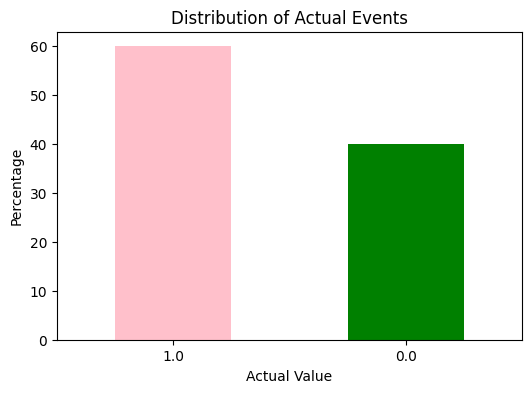

In [38]:
distribution = results['actual'].value_counts(normalize=True) * 100

print("Distribution of 'actual' values:\n", distribution)

plt.figure(figsize=(6, 4))
distribution.plot(kind='bar', color=['pink', 'green'])
plt.xlabel('Actual Value')
plt.ylabel('Percentage')
plt.title('Distribution of Actual Events')
plt.xticks(rotation=0)
plt.show()



In [5]:
threshold = 20
if min(distribution) < threshold:
    print("Warning: The dataset is imbalanced!")
else:
    print("The dataset is balanced.")

The dataset is balanced.


The Dataset is balanced

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

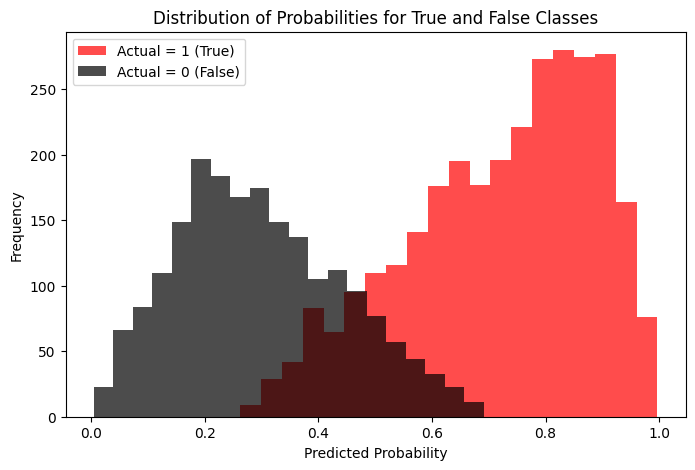

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(results[results['actual'] == 1.0]['prob'], bins=20, alpha=0.7, label='Actual = 1 (True)', color='red')
plt.hist(results[results['actual'] == 0.0]['prob'], bins=20, alpha=0.7, label='Actual = 0 (False)', color='black')

plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Probabilities for True and False Classes')
plt.legend()
plt.show()


The histogram shows that the model generally assigns higher probabilities to True cases (actual = 1.0) and lower probabilities to False cases (actual = 0.0). There is noticeable separation, but some overlap occurs around 0.4–0.6, indicating uncertainty in classification. The bimodal distribution, with peaks near 0.2–0.3 and 0.8–1.0, suggests that the model distinguishes classes well but may struggle with borderline cases. Misclassifications are more likely in the overlapping region, where predicted probabilities are less certain.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

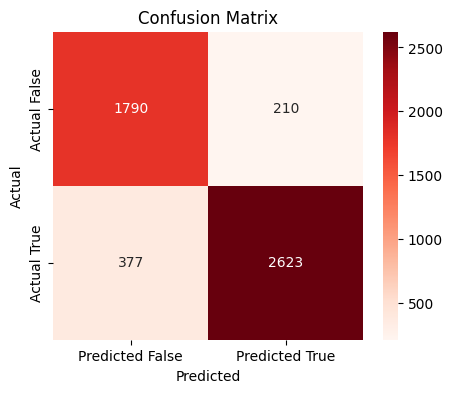

In [36]:
results['predicted'] = (results['prob'] >= 0.5).astype(int)

cm = confusion_matrix(results['actual'], results['predicted'])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted False', 'Predicted True'],
            yticklabels=['Actual False', 'Actual True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix shows that the model performs well, with 1,790 true negatives and 2,623 true positives. However, there are 210 false positives and 377 false negatives, indicating some misclassifications. The lower false positive rate suggests better precision, while the false negatives might impact recall.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [18]:
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]


accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.88
Precision: 0.93
Recall: 0.87


If I were using this model, I would prioritize recall if I were handling a problem where missing positive instances is more critical than false positives. However, if I were concerned about the cost of false positives (e.g., over-diagnosing or unnecessary actions), precision would be the priority. If the balance between both is important, I'd focus on the F1-score.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [21]:
results.head()

,actual,prob,predicted
0,0.0,0.380052,0
1,1.0,0.827923,1
2,1.0,0.929093,1
3,1.0,0.472508,0
4,1.0,0.906988,1


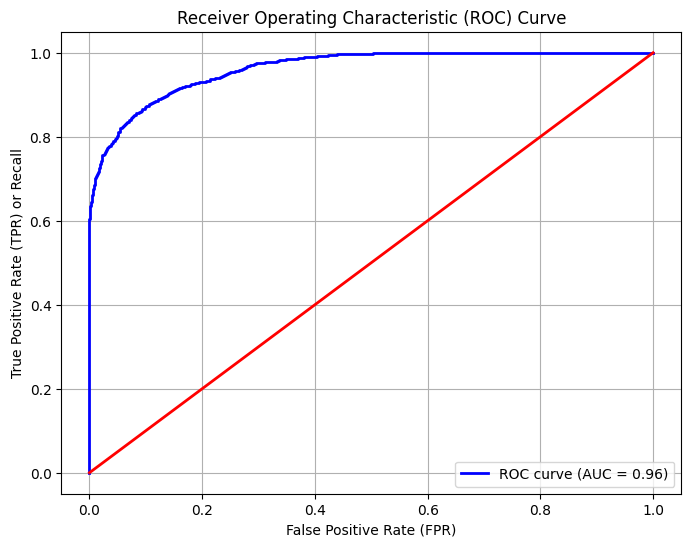

AUC: 0.96


In [39]:
fpr, tpr, thresholds = roc_curve(results['actual'], results['prob'])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'AUC: {roc_auc:.2f}')

The model performs excellently, with an AUC of 0.96, indicating strong discriminative ability. The ROC curve is steep, showing high recall with minimal false positives. Overall, the model is well-fitted and highly effective for classification tasks.